Import the necessary library

In [323]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [324]:
fraud_detection=pd.read_csv("/content/creditcard[1].csv")

In [325]:
fraud_detection.shape

(284807, 31)

In [326]:
fraud_detection.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [327]:
fraud_detection.dropna(inplace=True)

In [328]:
fraud_detection.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [329]:
fraud_detection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [330]:
fraud_detection.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [331]:
fraud_detection['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [332]:
normal=fraud_detection[fraud_detection.Class==0]
fraud=fraud_detection[fraud_detection.Class==1]

In [333]:
normal.shape

(284315, 31)

In [334]:
fraud.shape

(492, 31)

Under sapling

In [335]:
normal_sample=normal.sample(492)
normal_sample.shape

(492, 31)

In [336]:
new_dataset=pd.concat([normal_sample,fraud],axis=0)

In [337]:
new_dataset.shape

(984, 31)

In [338]:
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [339]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
102425,68199.0,-0.588265,1.209550,1.058434,-0.181819,0.156765,-0.491034,0.570231,0.128387,-0.376142,...,0.232573,-0.270299,-0.695680,-0.054490,-0.068934,-0.109812,0.081299,0.347306,0.142934,5.99
91389,63449.0,-0.268871,0.113144,1.933857,-1.665268,-0.856805,-1.322618,-0.054907,-0.048564,1.309402,...,-0.089670,0.516654,1.624927,0.078425,0.956576,-1.051392,-0.934370,0.322448,0.267608,9.99
79240,57933.0,-1.062072,1.049055,1.619101,1.261493,-0.264609,-1.167837,0.118257,0.239671,-1.283165,...,0.339419,-0.085133,-0.478381,-0.019322,0.934637,-0.092855,0.338639,-0.046007,-0.031270,11.99
108384,70871.0,1.156438,-0.149448,1.006693,1.074474,-0.652972,0.494697,-0.720806,0.317907,0.779359,...,-0.142379,-0.062998,-0.040835,-0.094812,-0.377395,0.453551,-0.381326,0.063402,0.019753,9.99
176910,122961.0,-2.328330,2.656661,-1.709362,-0.541326,-0.525711,-1.433023,-0.207123,1.142219,-0.500294,...,-0.680996,0.602283,0.951524,-0.136601,-0.076801,-0.085681,-0.265762,-1.270266,-0.077708,15.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [340]:
y

102425    0
91389     0
79240     0
108384    0
176910    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=2)

In [342]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify= y, random_state=1)

In [343]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify= y, random_state=3)

In [344]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,stratify= y, random_state=5)

In [345]:
x.shape,x_train.shape,x_test.shape

((984, 30), (738, 30), (246, 30))

Training the model using Logistic regression

In [346]:
model=LogisticRegression()

In [347]:
model.fit(x_train,y_train)

LogisticRegression()

In [348]:
x_train_prediction=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [349]:
print("Accuracy on train data:",training_data_accuracy)

Accuracy on train data: 0.9498644986449865


In [350]:
x_test_prediction=model.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction,y_test)

In [351]:
print("Accuracy on test data:",testing_data_accuracy)

Accuracy on test data: 0.9105691056910569


In [352]:
input_data=(58017,48192,-0.889876,0.626686,1.003331,0.75726,0.16287,0.029826,0.6258265,0.1524628,0.763345,0.54356,0.654356,1.330882,0.197943,0.440990,1.876365,-0.113603,-1.374318,0.234,0.439966,0.249883,0.206844,0.254483,-0.607276,0.222928,-0.074255,-0.003879,0.140512,263.42)
# Change the input data to numpy array

input_data_as_numpy_array=np.asarray(input_data)
# reshaping the numpy array as we are only predicting for instance(predicting for one variable)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]==0):
  print("The transaction is not fraud")

else:
  print("The transaction is fraud")

[1]
The transaction is fraud


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


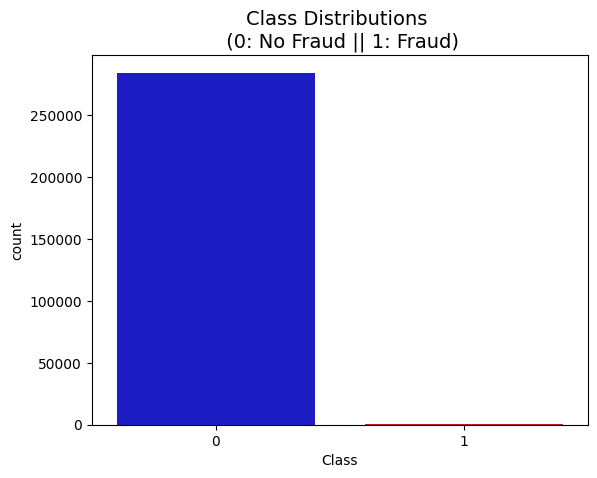

In [353]:
#Counter plot before unbalance the dataset
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=fraud_detection, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


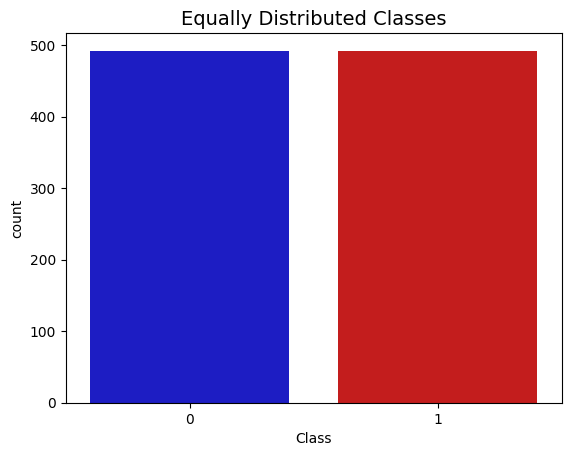

In [354]:
#Counter plot after unbalance the dataset
print('Distribution of the Classes in the subsample dataset')
print(new_dataset['Class'].value_counts()/len(new_dataset))



sns.countplot(x='Class', data=new_dataset, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

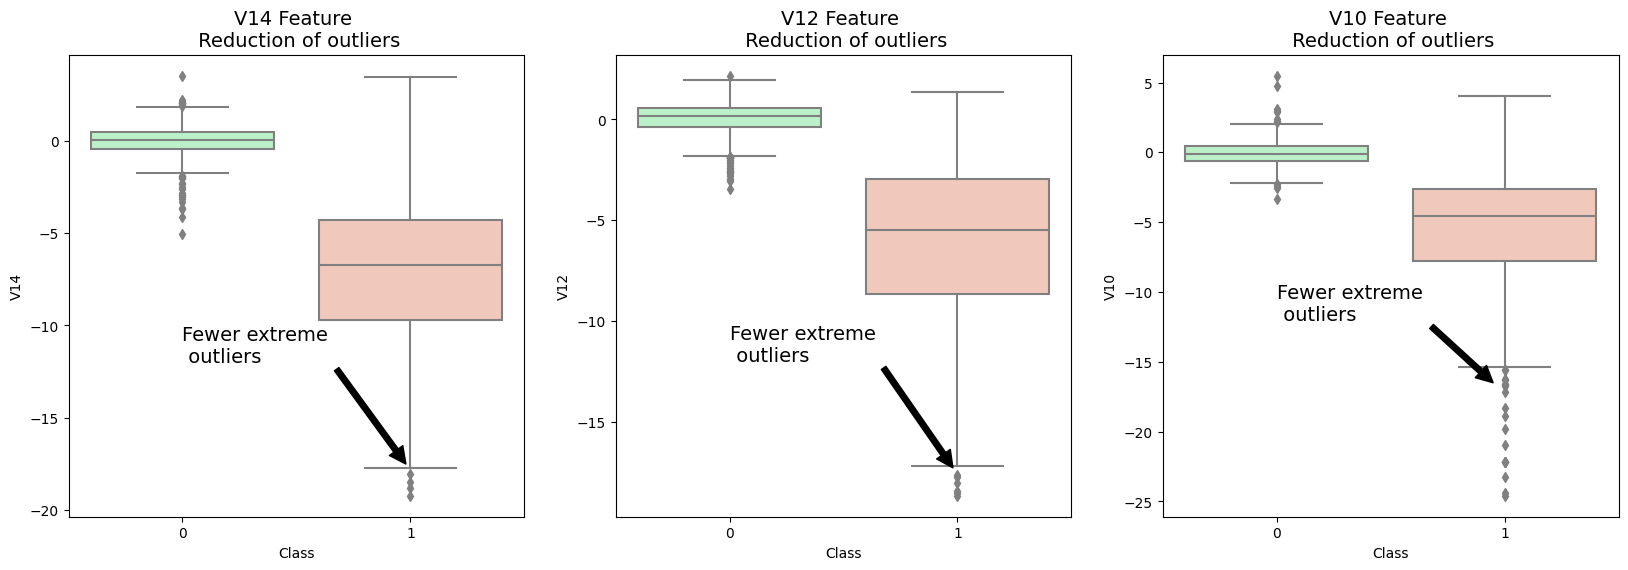

In [355]:
#Box plot for V14,V12,V10 column in dataset
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_dataset,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_dataset, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_dataset, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()
